In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")

2025-05-03 12:41:49,056 - data_processing.data_preprocessing - INFO - Applied one-hot encoding to ['surface', 'tourney_level', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand']
2025-05-03 12:41:49,647 - data_processing.data_preprocessing - INFO - Columns successfully dropped -> ['tourney_name', 'tourney_id', 'match_num', 'winner_name', 'loser_name', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'Unnamed: 0', 'loser_entry_S']
2025-05-03 12:41:49,726 - data_processing.data_preprocessing - INFO - 89263 rows dropped
2025-05-03 12:41:50,263 - utils.dataframe - INFO - 52931 winners assigned to player 1
2025-05-03 12:41:50,264 - utils.dataframe - INFO - 52802 winners assigned to player 2
2025-05-03 12:41:50,611 - data_processing.feature_engineering - INFO - Applying feature engineering


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105733 entries, 0 to 105538
Data columns (total 93 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   player_1_id                 105733 non-null  int64  
 1   player_1_seed               105733 non-null  float64
 2   player_1_ht                 105733 non-null  float64
 3   player_1_ioc                105733 non-null  int64  
 4   player_1_age                105733 non-null  float64
 5   player_1_rank               105733 non-null  float64
 6   player_1_rank_points        105733 non-null  float64
 7   player_1_entry_ALT          105733 non-null  bool   
 8   player_1_entry_Alt          105733 non-null  bool   
 9   player_1_entry_ITF          105733 non-null  bool   
 10  player_1_entry_LL           105733 non-null  bool   
 11  player_1_entry_PR           105733 non-null  bool   
 12  player_1_entry_Q            105733 non-null  bool   
 13  player_1_entry_SE  

In [4]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [5]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, shuffle=False)

In [6]:
x_train.tail()

player_1_id  player_1_seed  player_1_ht  player_1_ioc  player_1_age  \
102554       209414       0.500000        178.0            10          19.5   
102555       209406       0.125000        180.0            95          20.0   
102556       209098       0.166667        188.0            62          20.3   
102557       210506       0.250000        193.0             2          19.2   
102558       209406       0.125000        180.0            95          20.0   

        player_1_rank  player_1_rank_points  player_1_entry_ALT  \
102554       0.014286                 756.0               False   
102555       0.005405                 326.0               False   
102556       0.009091                 582.0               False   
102557       0.010309                 653.0               False   
102558       0.005405                 326.0               False   

        player_1_entry_Alt  player_1_entry_ITF  ...  \
102554               False               False  ...   
102555               False               False  ...   
102556               False               False  ...   
102557               False               False  ...   
102558               False               False  ...   

        player_1_last_10_win_ratio  player_2_last_10_win_ratio  \
102554                         0.2                         0.1   
102555                         0.0                         0.2   
102556                         0.1                         0.0   
102557                         0.0                         0.0   
102558                         0.0                         0.2   

        player_1_last_20_win_ratio  player_2_last_20_win_ratio  \
102554                        0.10                        0.05   
102555                        0.00                        0.10   
102556                        0.05                        0.00   
102557                        0.00                        0.00   
102558                        0.00                        0.10   

        player_1_last_50_win_ratio  player_2_last_50_win_ratio  age_diff  \
102554                        0.04                        0.02      -0.8   
102555                        0.00                        0.04       0.5   
102556                        0.02                        0.00       1.1   
102557                        0.00                        0.00      -0.8   
102558                        0.00                        0.04      -0.3   

        player_1_elo  player_2_elo    elo_diff  
102554   1649.779273   1747.591681  -97.812408  
102555   1508.660568   1622.566180 -113.905612  
102556   1774.804774   1634.719988  140.084786  
102557   1611.570511   1483.032492  128.538020  
102558   1533.805940   1797.954250 -264.148311  

[5 rows x 92 columns]

array([[<Axes: title={'center': 'player_1_id'}>,
        <Axes: title={'center': 'player_1_seed'}>,
        <Axes: title={'center': 'player_1_ht'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_1_age'}>,
        <Axes: title={'center': 'player_1_rank'}>,
        <Axes: title={'center': 'player_1_rank_points'}>],
       [<Axes: title={'center': 'player_2_id'}>,
        <Axes: title={'center': 'player_2_seed'}>,
        <Axes: title={'center': 'player_2_ht'}>,
        <Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'player_2_age'}>,
        <Axes: title={'center': 'player_2_rank'}>,
        <Axes: title={'center': 'player_2_rank_points'}>],
       [<Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>,
        <Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_

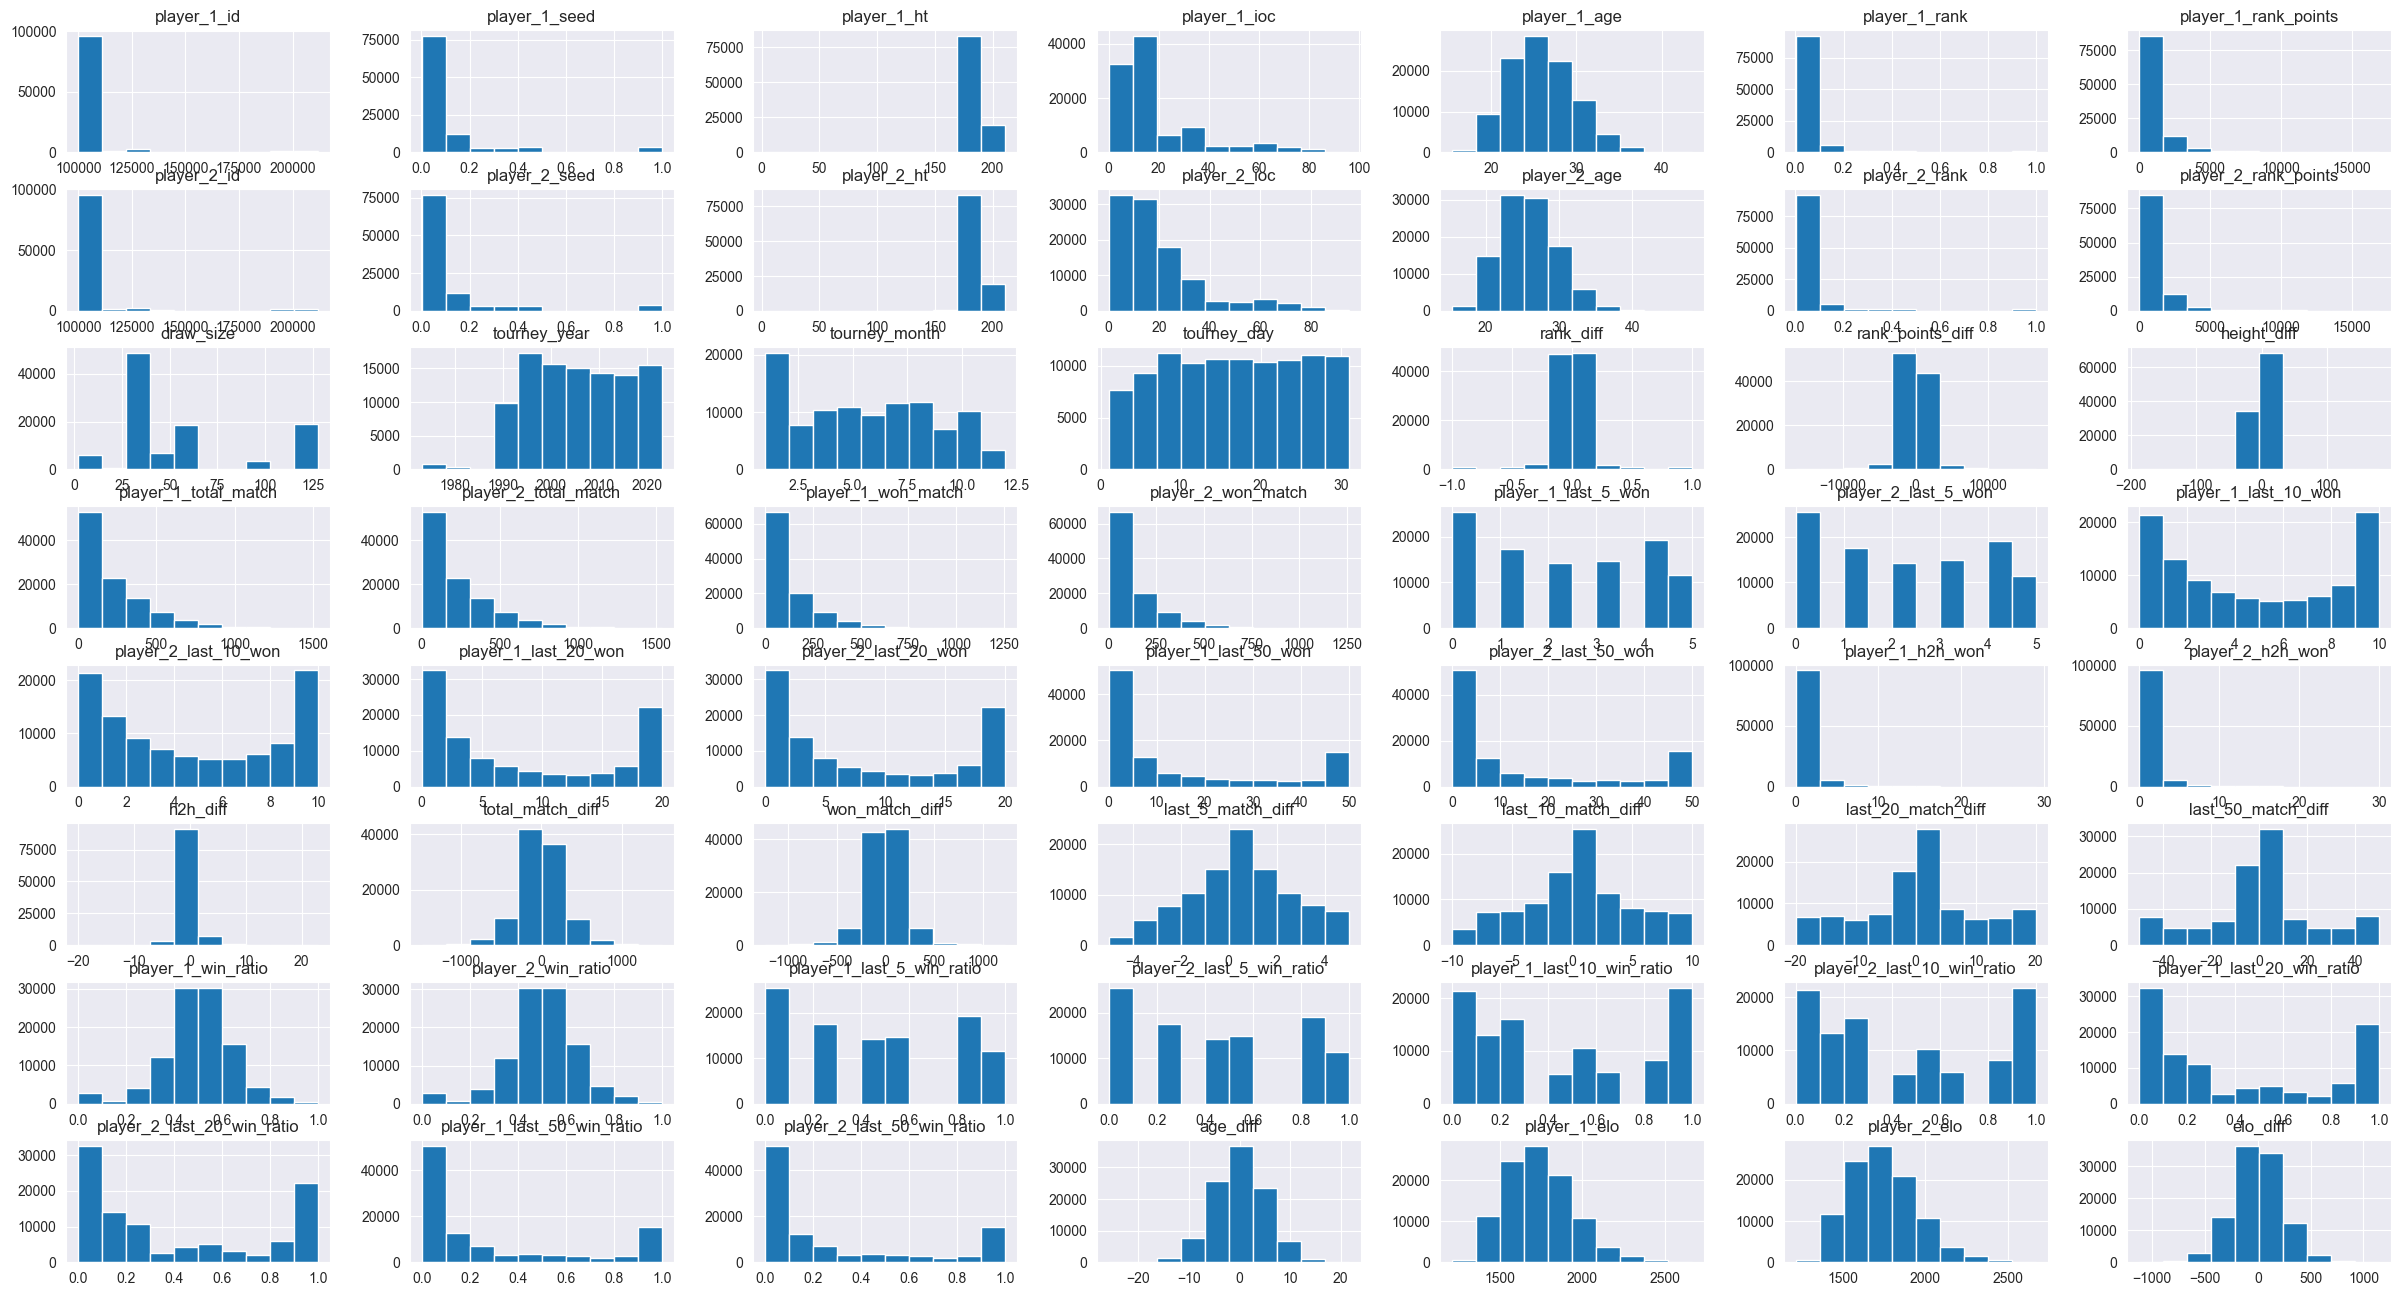

In [7]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(30, 16))

<Axes: >

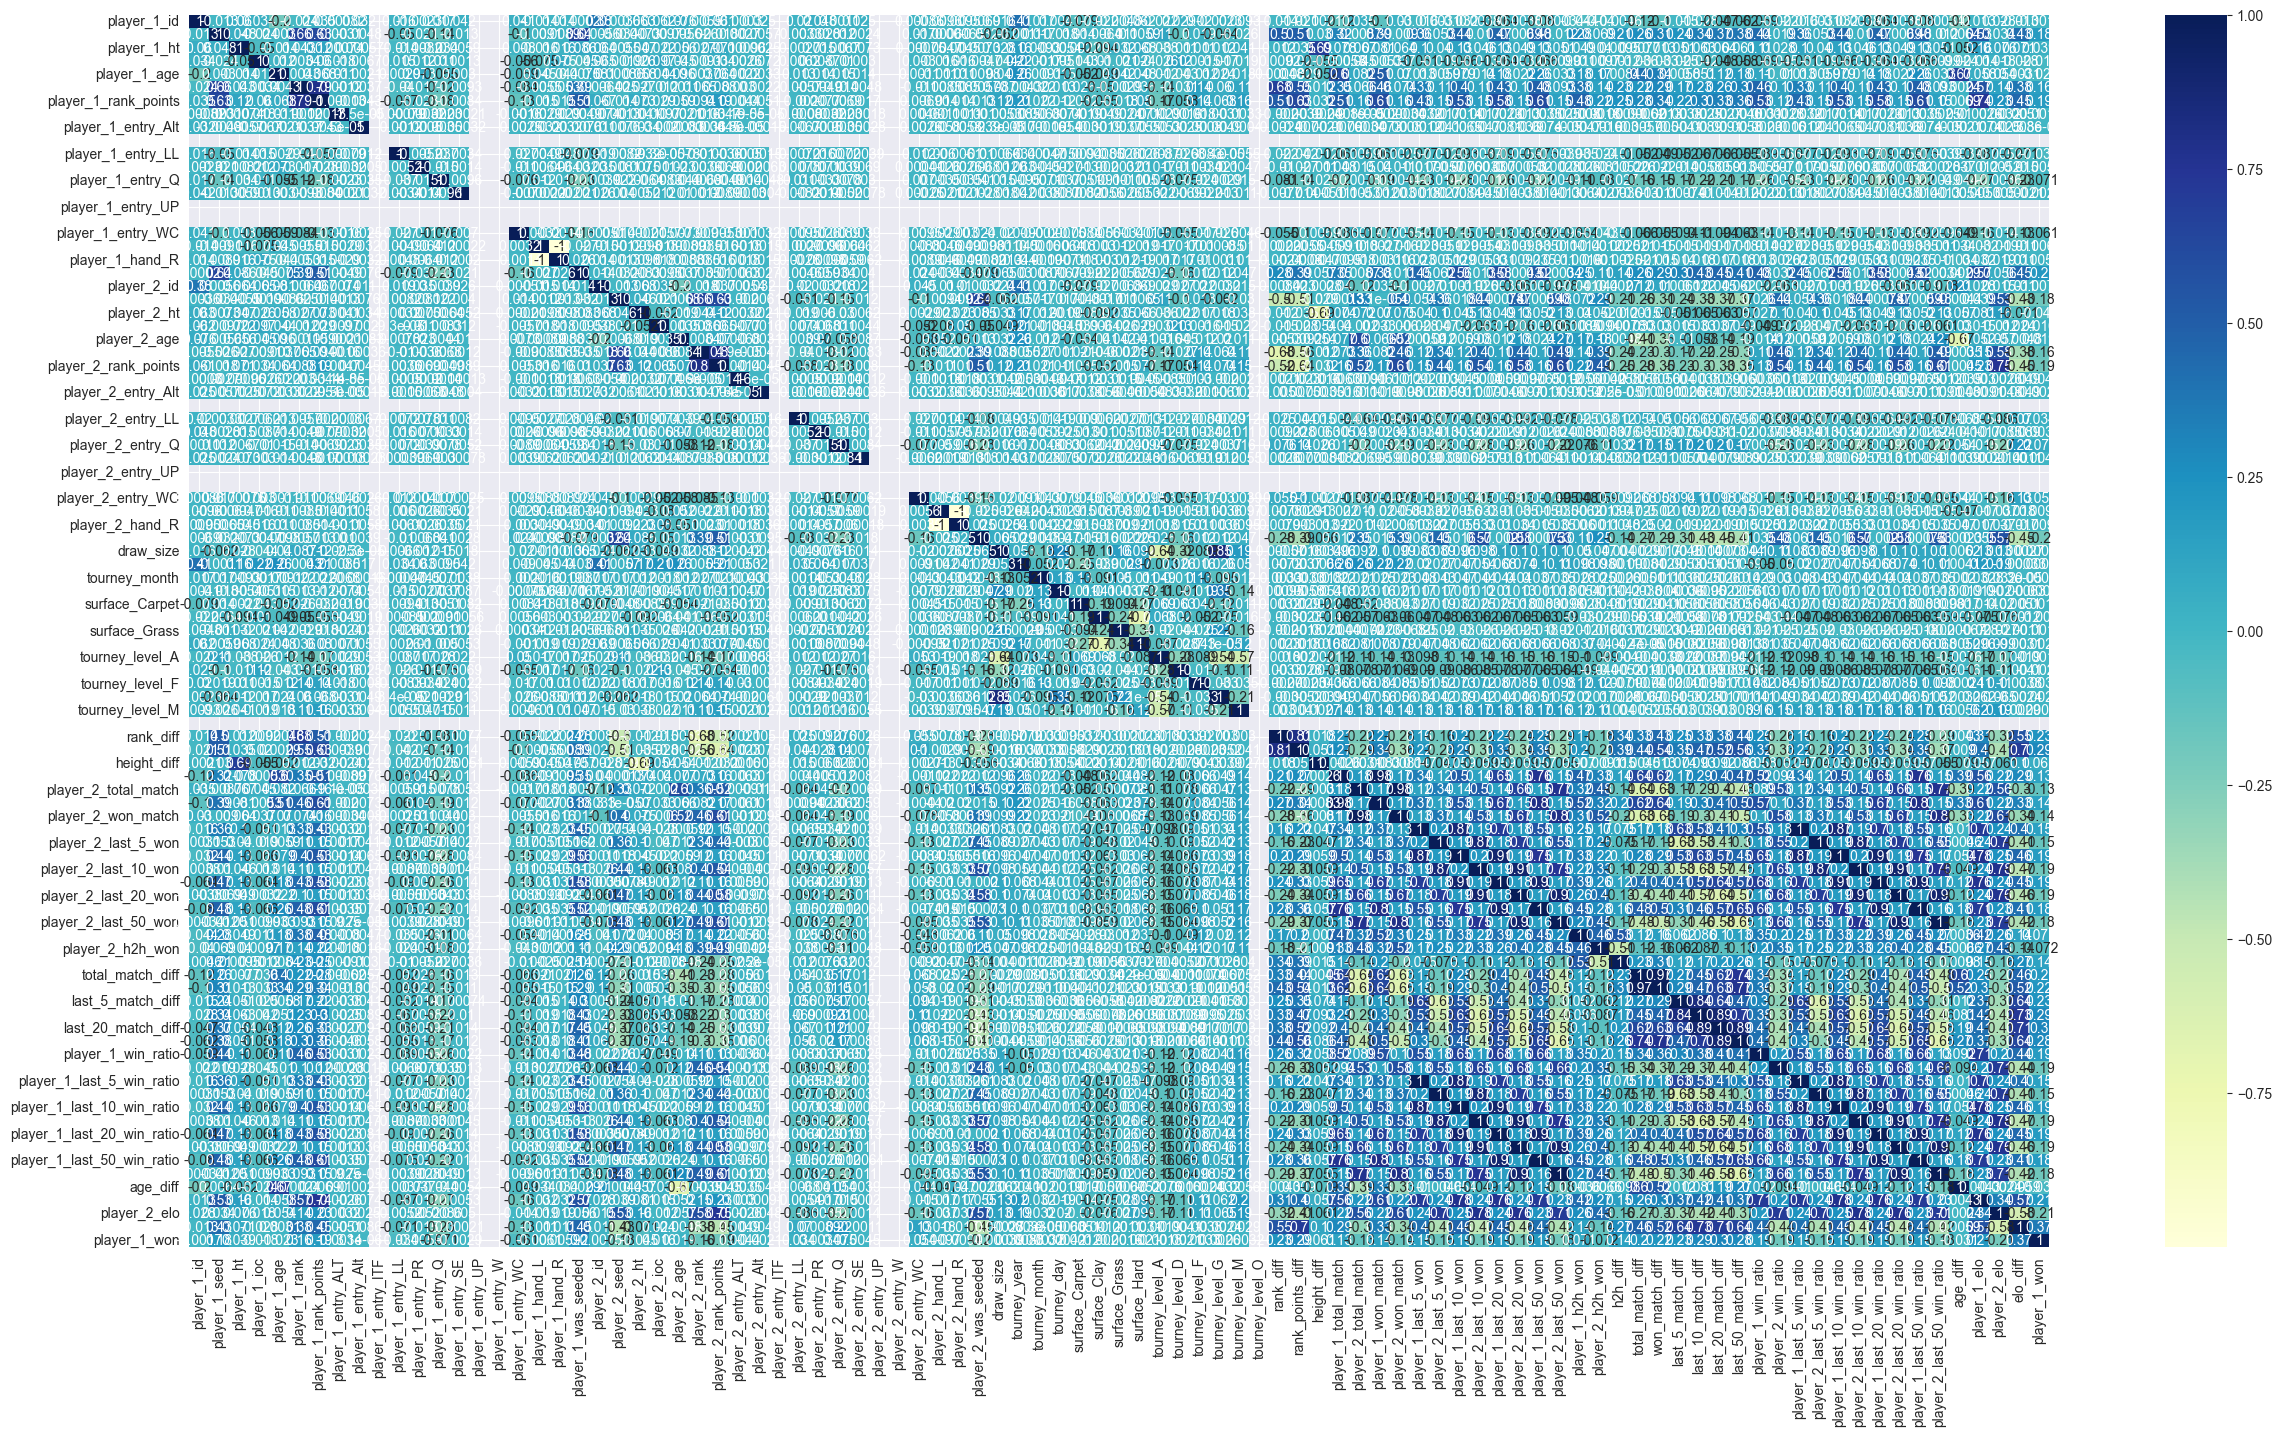

In [8]:
plt.figure(figsize=(30, 16))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
accuracy = forest.score(x_test, y_test)
print(f"Model Accuracy -> {accuracy *100}%")

Model Accuracy -> 64.0%


In [11]:
importances = forest.feature_importances_
feature_names = x.columns
importance_list = [[feature, importance] for feature, importance in
                   zip(feature_names, importances)]

importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance * 100}%")

elo_diff: 4.803830606784343%
rank_points_diff: 4.29564424085406%
rank_diff: 4.222838916727202%
player_2_elo: 2.8787085510087946%
player_1_elo: 2.8370610973603596%
player_2_rank_points: 2.720520237508927%
player_2_win_ratio: 2.5544231781400843%
age_diff: 2.5460790973845513%
player_1_rank_points: 2.53187115710083%
total_match_diff: 2.5228357128068106%
player_1_win_ratio: 2.4855561735802505%
last_50_match_diff: 2.4368252434622%
player_2_rank: 2.4316328196186507%
player_1_rank: 2.4186729598991605%
won_match_diff: 2.3715336638135227%
player_1_age: 2.3516080265518498%
player_2_age: 2.3180135579793353%
player_2_total_match: 2.1410164865840304%
player_1_total_match: 2.135343820917282%
player_2_id: 2.1287278647688406%
player_1_id: 2.1225648791348206%
player_1_won_match: 2.050020099087542%
player_2_won_match: 1.9889393990858057%
tourney_day: 1.969869093088682%
last_20_match_diff: 1.94918691794628%
height_diff: 1.8568932912597758%
player_2_ioc: 1.7702771346175954%
player_1_ioc: 1.761975455028961%